In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from sklearn import datasets
housedata = datasets.load_boston()
df_features = housedata.feature_names

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [3]:
housedata

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
df = pd.DataFrame(housedata.data, columns = df_features)

In [5]:
df['PRICE'] = housedata.target

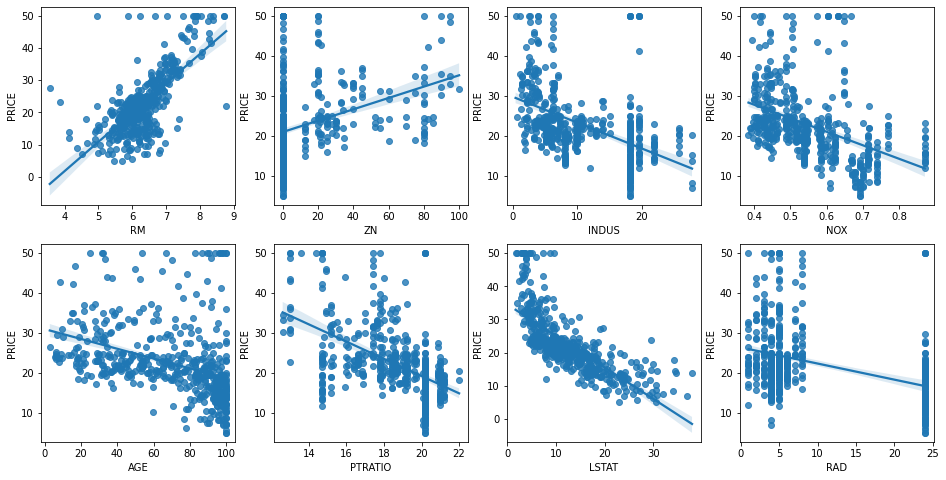

In [6]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']

for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='PRICE', data=df, ax=axs[row][col])

In [7]:
df_corr=df.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

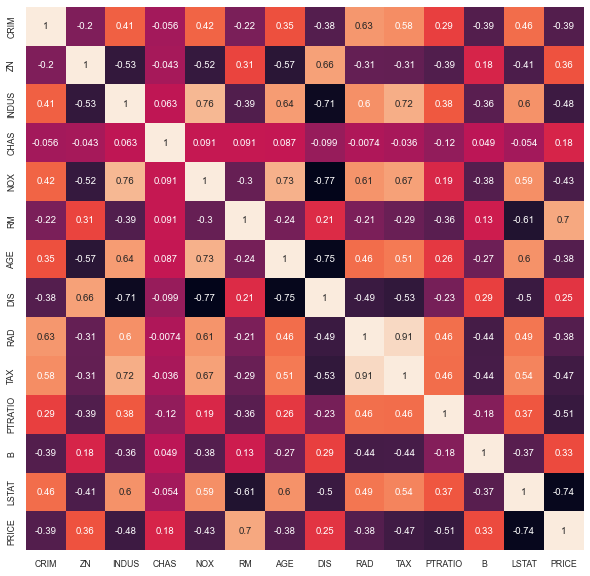

In [8]:
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show

In [9]:
#LSTAT, RM, PTRATIO, INDUS

In [10]:
df = df[['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'PRICE']]
df

,LSTAT,RM,PTRATIO,INDUS,PRICE
0,4.98,6.575,15.3,2.31,24.0
1,9.14,6.421,17.8,7.07,21.6
2,4.03,7.185,17.8,7.07,34.7
3,2.94,6.998,18.7,2.18,33.4
4,5.33,7.147,18.7,2.18,36.2
...,...,...,...,...,...
501,9.67,6.593,21.0,11.93,22.4
502,9.08,6.120,21.0,11.93,20.6
503,5.64,6.976,21.0,11.93,23.9
504,6.48,6.794,21.0,11.93,22.0


In [11]:
x_data=df.loc[:, ['LSTAT', 'RM', 'PTRATIO', 'INDUS']]

In [12]:
y_data=df.loc[:, 'PRICE']

In [13]:
x_data_L=df.loc[:, ['LSTAT']]

In [14]:
x_data_R=df.loc[:, ['RM']]

In [15]:
x_train_L, x_test_L, y_train_L, y_test_L = train_test_split(
    x_data_L, y_data, test_size = 0.2, random_state=2)

In [16]:
x_train_R, x_test_R, y_train_R, y_test_R = train_test_split(
    x_data_R, y_data, test_size = 0.2, random_state=2)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size = 0.2, random_state=2)

In [18]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 4) (404,)
(102, 4) (102,)


In [19]:
x_train.head()

,LSTAT,RM,PTRATIO,INDUS
321,6.87,6.376,19.6,7.38
37,8.77,5.850,19.2,5.96
286,12.93,6.230,18.2,1.76
2,4.03,7.185,17.8,7.07
25,16.51,5.599,21.0,8.14


In [20]:
y_train.head()

321    23.1
37     21.0
286    20.1
2      34.7
25     13.9
Name: PRICE, dtype: float64

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [23]:
y_pred

array([23.4125425 , 21.1591594 , 31.00492105, 28.48537149,  1.66104356,
        1.24870114, 27.62671373, 28.11844173, 20.26445321, 24.72649983,
       29.81673342, 27.35270712, 23.05030261, 16.91350771, 16.03686477,
       25.83318632, 17.5208165 , 11.85284335, 11.53800217, 18.5020467 ,
       24.46981328, 18.9983775 , 34.43527011, 20.14138873, 20.06477398,
       17.03428543, 38.22430117, 35.97844548, 31.85721811, 25.80793196,
       17.34147726, 22.51836777, 32.04102464, 29.58923642, 12.56660528,
       21.02931153, 11.01791574, 21.07173925, 24.61056143, 23.16657759,
       27.96425735, 11.78942178, 30.71527221,  4.3300578 , 21.96772162,
       19.03285669, 35.39451903, 18.27188702, 33.60402217,  0.48235606,
       30.19267562, 29.49450866,  6.36255573, 33.71958548, 18.38025016,
       20.83047134, 20.3384842 , 17.19323088, 16.21729435, 18.2440667 ,
       20.86257917, 21.78205635, 18.37181879, 27.99577856, 32.88729061,
       24.01316046, 38.19489688, 27.69170752, 12.07933202, 28.85

In [24]:
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

0.6586220267554069
0.7554747476631425


In [25]:
x_train

,LSTAT,RM,PTRATIO,INDUS
321,6.87,6.376,19.6,7.38
37,8.77,5.850,19.2,5.96
286,12.93,6.230,18.2,1.76
2,4.03,7.185,17.8,7.07
25,16.51,5.599,21.0,8.14
...,...,...,...,...
22,18.72,6.142,21.0,8.14
72,5.52,6.065,19.2,10.81
493,12.01,5.707,19.2,9.69
15,8.47,5.834,21.0,8.14


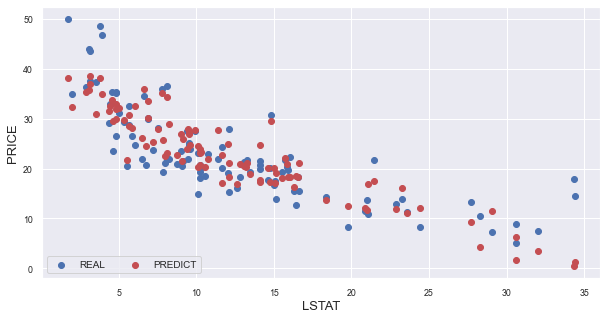

In [26]:
plt.figure(figsize=(10,5))
a=plt.scatter(x_test['LSTAT'], y_test, label='y_test')
b=plt.scatter(x_test['LSTAT'], y_pred, c='r', label='y_pred')
plt.xlabel('LSTAT', fontsize=13)
plt.ylabel('PRICE', fontsize=13)
plt.legend((a, b),
           ('REAL', 'PREDICT'),
           scatterpoints=1,
           loc='lower left',
           ncol=3, fontsize=10)
plt.show()

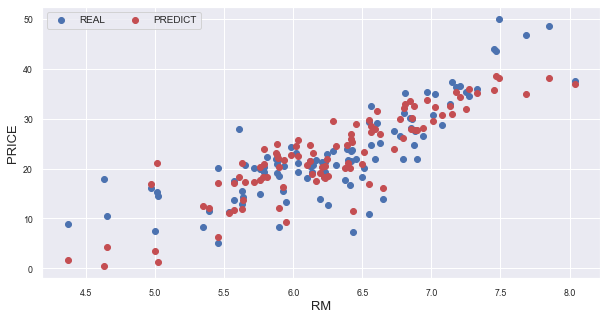

In [27]:
plt.figure(figsize=(10,5))
plt.scatter(x_test['RM'], y_test, label='y_test')
plt.scatter(x_test['RM'], y_pred, c='r', label='y_pred')
plt.xlabel('RM', fontsize=13)
plt.ylabel('PRICE', fontsize=13)
plt.legend((a, b),
           ('REAL', 'PREDICT'),
           scatterpoints=1,
           loc='upper left',
           ncol=3, fontsize=10)
plt.show() 

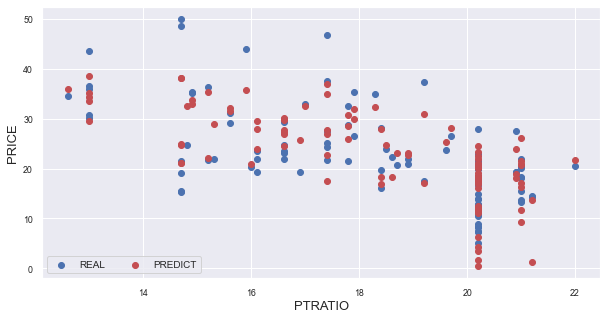

In [28]:
plt.figure(figsize=(10,5))
a=plt.scatter(x_test['PTRATIO'], y_test, label='y_test')
b=plt.scatter(x_test['PTRATIO'], y_pred, c='r', label='y_pred')
plt.xlabel('PTRATIO', fontsize=13)
plt.ylabel('PRICE', fontsize=13)
plt.legend((a, b),
           ('REAL', 'PREDICT'),
           scatterpoints=1,
           loc='lower left',
           ncol=3, fontsize=10)
plt.show() 

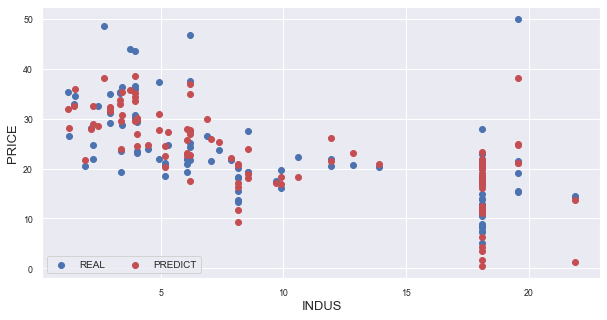

In [29]:
plt.figure(figsize=(10,5))
plt.scatter(x_test['INDUS'], y_test, label='y_test')
plt.scatter(x_test['INDUS'], y_pred, c='r', label='y_pred')
plt.xlabel('INDUS', fontsize=13)
plt.ylabel('PRICE', fontsize=13)
plt.legend((a, b),
           ('REAL', 'PREDICT'),
           scatterpoints=1,
           loc='lower left',
           ncol=3, fontsize=10)
plt.show() 

In [30]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_pred):.3f}')

MSE : 20.457, RMSE: 4.523
Variance score : 0.755


In [31]:
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(x_train_L, y_train_L)
y_pred_L = lr.predict(x_test_L)
print(lr.score(x_train_L, y_train_L))
print(lr.score(x_test_L, y_test_L))

0.529210533823312
0.6029904192340267


In [32]:
print(lr.coef_, lr.intercept_)

[-0.95313207] 34.56947043181114


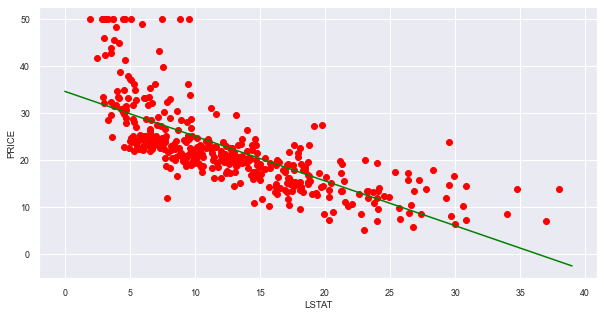

In [33]:
plt.figure(figsize=(10,5))
point = np.arange(0, 40)
plt.scatter(x_train_L, y_train_L, color='red')
plt.plot(point,-0.953*point + 34.567, color = 'green')
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.show()

In [34]:
mse = mean_squared_error(y_test, y_pred_L)
rmse = np.sqrt(mse)
print('LSTAT')
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_pred_L):.3f}')

LSTAT
MSE : 33.214, RMSE: 5.763
Variance score : 0.603


In [35]:
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(x_train_R, y_train_R)
y_pred_R = lr.predict(x_test_R)
print(lr.score(x_train_R, y_train_R))
print(lr.score(x_test_R, y_test_R))

0.44475351431246324
0.633543994842449


In [36]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(x_test)
mse = np.sqrt(mean_squared_error(dy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 4.672730653986583


In [37]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(x_test)
mse = np.sqrt(mean_squared_error(ry_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 3.2363784271202607


In [52]:
""""from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error

sy_preds = model.predict(x_test)
mse = np.sqrt(mean_squared_error(sy_preds, y_test))
print('평균제곱근오차', mse)
분류"""

'"from sklearn.svm import SVC\n\nmodel = SVC()\nmodel.fit(x_train, y_train)\n\nfrom sklearn.metrics import mean_squared_error\n\nsy_preds = model.predict(x_test)\nmse = np.sqrt(mean_squared_error(sy_preds, y_test))\nprint(\'평균제곱근오차\', mse)\n분류'

In [53]:
from sklearn.svm import SVR

model = SVR()
model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error

sry_preds = model.predict(x_test)
mse = np.sqrt(mean_squared_error(sry_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 5.030742434149076


In [54]:
print(lr.coef_, lr.intercept_)

[8.74934434] -32.55158436780961


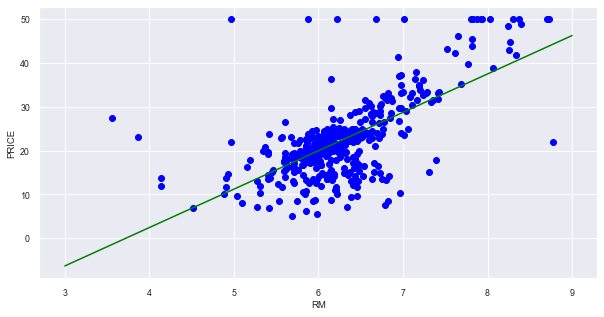

In [55]:
plt.figure(figsize=(10,5))
point = np.arange(3, 10)
plt.scatter(x_train_R, y_train_R, color='blue')
plt.plot(point,8.75*point - 32.551, color = 'green')
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.show()

In [56]:
mse = mean_squared_error(y_test, y_pred_R)
rmse = np.sqrt(mse)
print("RM")
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_pred_R):.3f}')

RM
MSE : 30.658, RMSE: 5.537
Variance score : 0.634


In [57]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [58]:
x_train_scaled

array([[-0.83410575,  0.12928555,  0.52359086, -0.5837312 ],
       [-0.56340806, -0.62111587,  0.33155209, -0.78968387],
       [ 0.02927739, -0.07900077, -0.14854484, -1.39883965],
       ...,
       [-0.10179728, -0.82512234,  0.33155209, -0.24869553],
       [-0.6061498 , -0.64394177,  1.19572656, -0.47350302],
       [-0.23144722,  0.04796829, -1.82888409,  1.18572129]])

In [59]:
type(x_train_scaled)

numpy.ndarray

In [60]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns = ['LSTAT', 'RM', 'PTRTIO', 'INDUS'])
x_train_scaled.head()

,LSTAT,RM,PTRTIO,INDUS
0,-0.834106,0.129286,0.523591,-0.583731
1,-0.563408,-0.621116,0.331552,-0.789684
2,0.029277,-0.079001,-0.148545,-1.398840
3,-1.238728,1.283420,-0.340584,-0.628693
4,0.539329,-0.979197,1.195727,-0.473503


In [61]:
x_test_scaled = pd.DataFrame(x_test_scaled, columns = ['LSTAT', 'RM', 'PTRTIO', 'INDUS'])
x_test_scaled.head()

,LSTAT,RM,PTRTIO,INDUS
0,-0.274923,0.327755,0.801681,1.219232
1,-0.033055,-1.799146,-1.450413,1.444104
2,-1.164417,1.227544,0.392210,-0.778784
3,-0.884220,0.398605,-0.181051,-1.157115
4,2.413383,-2.711687,0.801681,1.219232


In [62]:
type(x_train_scaled)

pandas.core.frame.DataFrame

In [63]:
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(x_train_scaled, y_train)
y_scaled_pred = lr.predict(x_test_scaled)

In [64]:
print(lr.score(x_train_scaled, y_train))
print(lr.score(x_test_scaled, y_test))

0.6586220267554068
0.7584068389958922


In [65]:
mse = mean_squared_error(y_test, y_scaled_pred)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_scaled_pred):.3f}')

MSE : 20.212, RMSE: 4.496
Variance score : 0.758


In [66]:
print("회귀계수(기울기):", np.round(lr.coef_, 1)) #np: numpy, coef_: 피처에 대한 회귀 계수 값
print("상수항(절편):", np.round(lr.intercept_, 1))

회귀계수(기울기): [-4.3  3.  -2.   0.1]
상수항(절편): 22.4


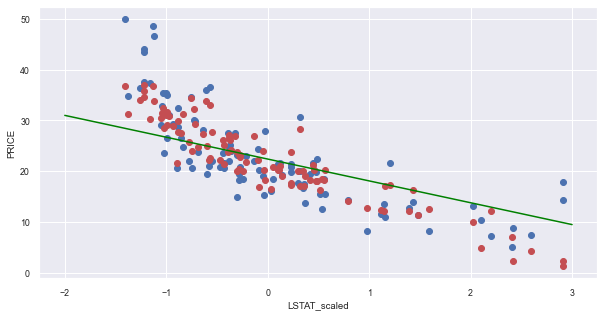

In [67]:
plt.figure(figsize=(10,5))
point = np.arange(-2, 4)
plt.scatter(x_test_scaled['LSTAT'], y_test, label='y_test')
plt.scatter(x_test_scaled['LSTAT'], y_scaled_pred, c='r', label='y_pred')
plt.plot(point,-4.3*point + 22.4, color = 'green')
plt.xlabel('LSTAT_scaled')
plt.ylabel('PRICE')
plt.show()

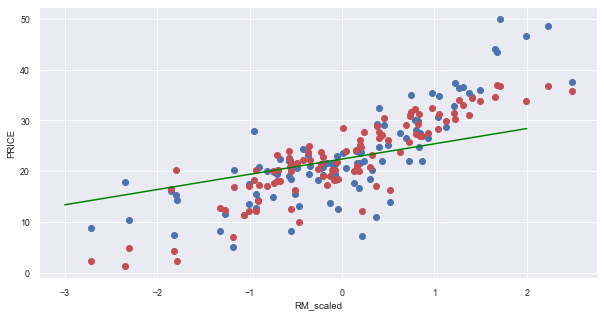

In [68]:
plt.figure(figsize=(10,5))
point = np.arange(-3, 3)
plt.scatter(x_test_scaled['RM'], y_test, label='y_test')
plt.scatter(x_test_scaled['RM'], y_scaled_pred, c='r', label='y_pred')
plt.plot(point,3*point + 22.4, color = 'green')
plt.xlabel('RM_scaled')
plt.ylabel('PRICE')
plt.show() 